# Simple Linear Regression

In this notebook, we will build a linear regression model to predict ```sales``` using appropriate predictor variable

1. reading and understanding data
2. Training model
3. Residual analysis
4. Predicting and evaluating on test set

# Step 1: Reading and Understanding the Data

let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the data

advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Sales is the target variable and the other three are the predictor variables

In [3]:
advertising.shape

(200, 4)

200 rows and 4 columns

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [6]:
# visualise the dataset

import matplotlib.pyplot as plt
import seaborn as sns

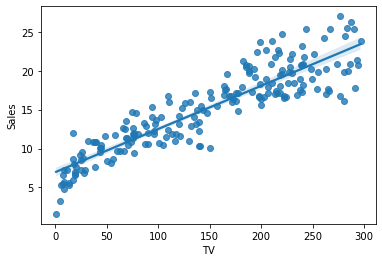

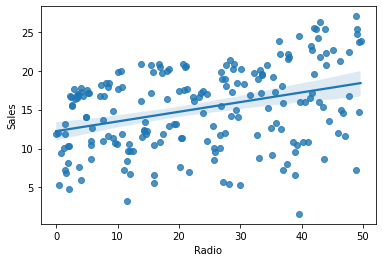

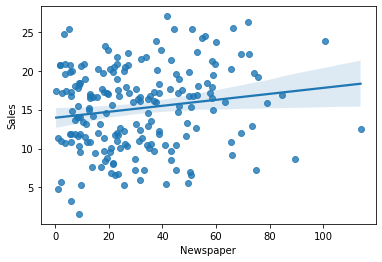

In [13]:
for col in advertising.columns:
    if col != 'Sales':
        sns.regplot(data=advertising, x=col, y='Sales')
        plt.show()
    else:
        continue

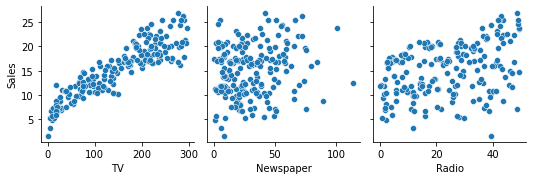

In [18]:
sns.pairplot(data=advertising, x_vars=['TV','Newspaper','Radio'], y_vars='Sales')

<AxesSubplot:>

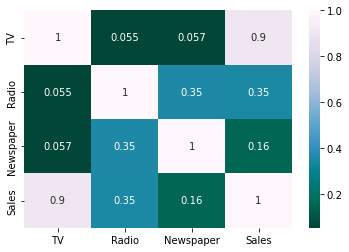

In [24]:
sns.heatmap(advertising.corr(), cmap='PuBuGn_r', annot=True)

TV has a high correlation with sales while the other two predictors do not

# Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [29]:
#import the stats models library

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

 ### Steps in model building
 
 1. Create X and Y
 2. Create train and test set (70:30, 80:20) - ratio train to test
 3. Train model on training set (i.e learn the coefficients)
 4. Evalulate the model (training set- should fit well, test set - should generalise well)

In [27]:
#create x and y
X = advertising['TV']
y = advertising['Sales']

#convention is X is upper case and y lowercase. The reason is because in multiple regression, X is
#usually a dataframe with multiple variables while y is a single column'''

In [30]:
# train-test split

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.70, random_state=100)

#random_state means we get the same training set each time we run it, if we change the 100 then you get a diff set

X_train.shape

(140,)

In [31]:
X_test.shape

(60,)

In [32]:
y_train.shape

(140,)

In [33]:
y_test.shape

(60,)

Note that 140/200 is 0.7 so as we can see the data set was split with a ratio of 70:30 train:test

In [34]:
# training the model
#using statsmodel first

X_train_sm = sm.add_constant(X_train)

X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [35]:
#fitting the model
#using modified X_train with constant intercept
lr = sm.OLS(y_train, X_train_sm)  #instance of linear regression object

lr_model = lr.fit() 

lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [36]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        14:09:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

statsmodels provides details statistical information while sklearn does not. statsmodel is more so for statisticians while sklearn is more for programmers

1. The coef and p values - low p values
2. R-squared is 81.6% so very high
3. Prob(F-Statistic) is very low so the fit is not by chance

In [41]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

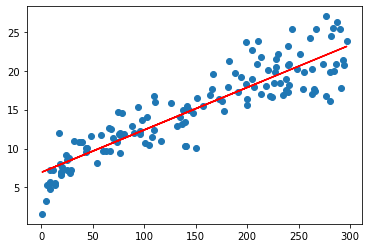

In [40]:
#plt the model again training set

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = 'red')
plt.show()

### Residual Analysis

In [42]:
#error = f(y_train, y_train_pred)

res = y_train - y_train_pred


C:\Users\micke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

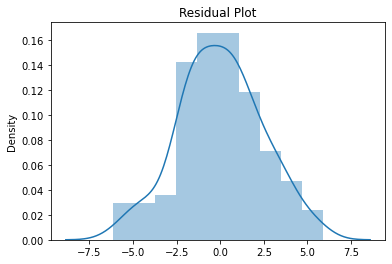

In [44]:
#plot residuals

plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

the centre should be at 0.0 and the shape should follow a normal distribution shape. In this case both assumptions are true

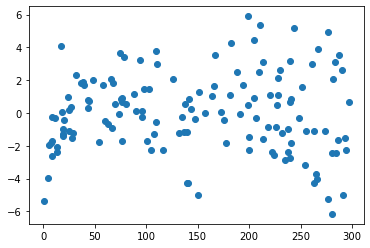

In [47]:
# look for patterns in the residuals (there should be none - i.e scattered everywhere)

plt.scatter(x=X_train, y=res)
plt.show()



the values for res should be scattered around y=0, if there is a pattern then a linear model may not be ideal

## Step 4 Making Predictions and Evaluating on the Test Set

1. make predictions on the test set
2. evaluate the model, r-squared, on the test set

In [48]:
# add constant/intercept to test set
X_test_sm = sm.add_constant(X_test)

#prediction on test set

y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [49]:
#evaluate the model - r-squared

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245656

In [51]:
# mean squared error

mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.07755637182696

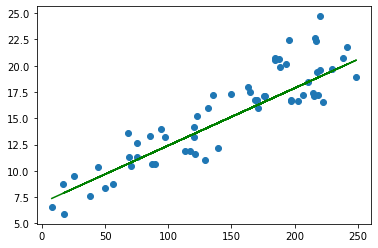

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color = 'Green')
plt.show()

## Linear Regression Using `sklearn`

In [ ]:
# train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.70, random_state=100)


#### Steps in `sklearn` model building

1. create an object of linear regression, if a linear regression object
2. fit the model
3. see the parameters, make predictions (train, test)
4. evaluate the model (r2, MSE, etc)

In [54]:
#create linear regression object

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [55]:
#fit the model

lm.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

this happens because the shape is (140,) but it needs (140,1) so we will need to reshape the data

In [56]:
#reshape X_train to (140,1)

X_train_lm = X_train.values.reshape(-1,1) #-1 means just give back all the OG rows basically
X_test_lm = X_test.values.reshape(-1,1)

In [57]:
lm.fit(X_train_lm, y_train)

LinearRegression()

In [58]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [61]:
print('TV ',lm.coef_)
print('intercept ', lm.intercept_)

TV  [0.05454575]
intercept  6.94868320000136


In [62]:
#make predictions

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [63]:
# evaluate model
print('R2 on training: ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('R2 on test: ', r2_score(y_true=y_test, y_pred=y_test_pred))

R2 on training:  0.8157933136480388
R2 on test:  0.792103160124566


`sklearn` is more straight forward, but if you want a detailed summary then you use `statsmodels` esp for multi-linear regression